**ADF Test & KPSS Test**

Before forecasting values in a series, It is important to know if a series is stationary or not. Therefore, I have started with the ADF & KPSS Test.

 ADF Tests are more accurate, but in the past i found that sometimes both test give contradictory results. Therefore, I apply both tests for more accurate results.

 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
train = pd.read_csv('/content/Arc Welding Machines, Components, and Accessories (Except Electrodes), Excluding Stud Welding Equipment US PPI.csv')
train.head()

,DATE,price
0,01-01-1973,46.0
1,01-02-1973,46.0
2,01-03-1973,46.0
3,01-04-1973,46.0
4,01-05-1973,46.0


The Dickey Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test are:

Null Hypothesis: The series has a unit root (value of a =1)

Alternate Hypothesis: The series has no unit root.

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary

In [ ]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(train['price'])

Results of Dickey-Fuller Test:
Test Statistic                   1.616013
p-value                          0.997905
#Lags Used                      12.000000
Number of Observations Used    554.000000
Critical Value (1%)             -3.442209
Critical Value (5%)             -2.866771
Critical Value (10%)            -2.569556
dtype: float64


Series is not Stationary because test static>critical value

KPSS Test

In [ ]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
      print (kpss_output)
kpss_test(train['price'])      

Results of KPSS Test:
Test Statistic           2.862101
p-value                  0.010000
Lags Used               19.000000
Critical Value (10%)     0.347000
dtype: float64
Test Statistic           2.862101
p-value                  0.010000
Lags Used               19.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
dtype: float64
Test Statistic            2.862101
p-value                   0.010000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64
Test Statistic            2.862101
p-value                   0.010000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


**Test for stationarity:** If the test statistic is greater than the critical value, we reject the null hypothesis (series is not stationary). If the test statistic is less than the critical value, if fail to reject the null hypothesis (series is stationary). For the data, the value of the test statistic is greater than the critical value at all confidence intervals, and hence we can say that the series is not stationary.


**Strict Stationary:** A strict stationary series satisfies the mathematical definition of a stationary process. For a strict stationary series, the mean, variance and covariance are not the function of time. The aim is to convert a non-stationary series into a strict stationary series for making predictions.

**Trend Stationary:** A series that has no unit root but exhibits a trend is referred to as a trend stationary series. Once the trend is removed, the resulting series will be strict stationary. The KPSS test classifies a series as stationary on the absence of unit root. This means that the series can be strict stationary or trend stationary.

**Difference Stationary:** A time series that can be made strict stationary by differencing falls under difference stationary. ADF test is also known as a difference stationarity test.

It’s always better to apply both the tests, so that we are sure that the series is truly stationary. Let us look at the possible outcomes of applying these stationary tests.

**Case 1:** Both tests conclude that the series is not stationary -> series is not stationary.

**Case 2:** Both tests conclude that the series is stationary -> series is stationary.

**Case 3:** KPSS = stationary and ADF = not stationary  -> trend stationary, remove the trend to make series strict stationary.

**Case 4:** KPSS = not stationary and ADF = stationary -> difference stationary, use differencing to make series stationary.


**Making a Time Series Stationary**

Now that we are familiar with the concept of stationarity and its different types, we can finally move on to actually making our series stationary. Always keep in mind that in order to use time series forecasting models, it is necessary to convert any non-stationary series to a stationary series first.

 

**Differencing**

In this method, we compute the difference of consecutive terms in the series. Differencing is typically performed to get rid of the varying mean. Mathematically, differencing can be written as:

yt‘ = yt – y(t-1)

where yt is the value at a time t

**Applying differencing on our series and plotting the results:**

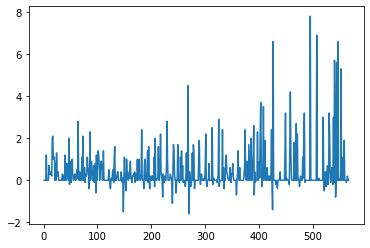

In [ ]:
train['price-diff'] = train['price'] - train['price'].shift(1)
train['price-diff'].dropna().plot()

**Seasonal Differencing**

In seasonal differencing, instead of calculating the difference between consecutive values, we calculate the difference between an observation and a previous observation from the same season. For example, an observation taken on a Monday will be subtracted from an observation taken on the previous Monday.We have monthly data in our datasets. therefore we'll take seasonality as 12...

Mathematically it can be written as:

yt‘ = yt – y(t-n)

In [ ]:
n=12
train['price-diff'] = train['price'] - train['price'].shift(n)

**Transformation**

Transformations are used to stabilize the non-constant variance of a series. Common transformation methods include power transform, square root, and log transform. We'll do a quick log transform and differencing on our dataset:

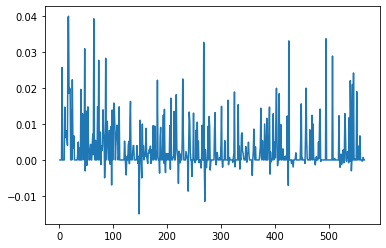

In [ ]:
train['price_log'] = np.log(train['price'])
train['price_log_diff'] = train['price_log'] - train['price_log'].shift(1)
train['price_log_diff'].dropna().plot()

In [ ]:
train = train.astype('float32')

NameError: ignored